In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pycandy import DiscreteDynamicalSystem as dds
from joblib import Parallel, delayed

# Standard map

## Enter exit regions

In [2]:
parameters = np.array([2.0])
stdmap = dds(model="standard map")
exists = np.array([[[0.05, 0.15], [0, 1]], [[0.85, 0.95], [0, 1]]], dtype=np.float64)
N = 100000

In [3]:
exists

array([[[0.05, 0.15],
        [0.  , 1.  ]],

       [[0.85, 0.95],
        [0.  , 1.  ]]])

In [4]:
exists[1, 0, :]

array([0.85, 0.95])

In [5]:
u = np.array([0.12, 0.5])
stdmap.escape_analysis(u, N, exists, parameters=parameters)

(2, 4)

In [6]:
xlims = (0, 1)
ylims = (0, 1)
grid = 540
x = np.linspace(xlims[0], xlims[1], grid)
y = np.linspace(ylims[0], ylims[1], grid)
X, Y = np.meshgrid(x, y)

In [7]:
escape = np.array(Parallel(n_jobs=-1)(delayed(stdmap.escape_analysis)(np.array([X[i, j], Y[i, j]]), N, exists, parameters=parameters) for i in range(grid) for j in range(grid)))

In [8]:
escape[:, 0].shape

(291600,)

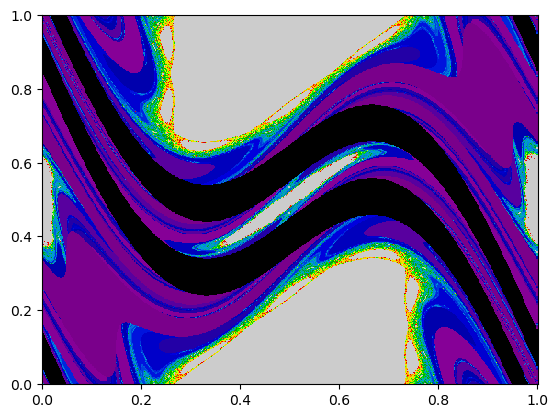

In [9]:
plt.pcolor(X, Y, escape[:, 1].reshape(grid, grid), cmap="nipy_spectral", norm=mpl.colors.LogNorm(vmin=1, vmax=N))

In [10]:
from matplotlib.colors import ListedColormap, BoundaryNorm

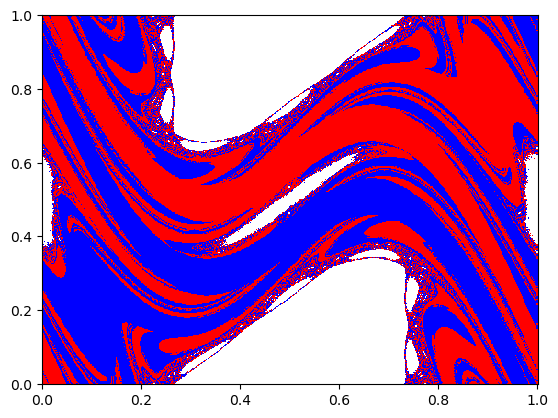

In [11]:
colors = ["white", "red", "blue"]
cmap = ListedColormap(colors)  # 0 → blue, 1 → green, 2 → red
bounds = [0, 1, 2, 3]  # edges between categories
norm = BoundaryNorm(bounds, cmap.N)

plt.pcolor(X, Y, escape[:, 0].reshape(grid, grid), cmap=cmap, norm=norm)

In [12]:
times, sp = stdmap.survival_probability(escape[:, 1], N)

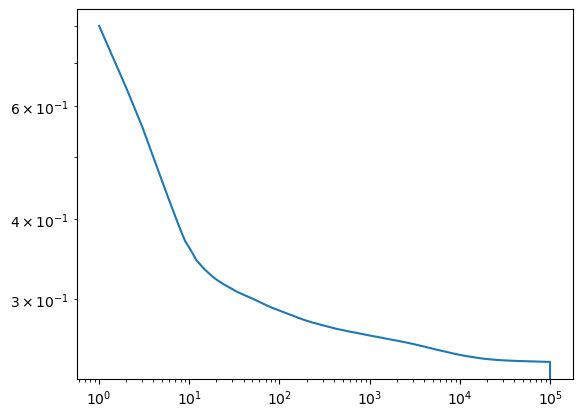

In [13]:
plt.plot(times, sp)
plt.xscale("log")
plt.yscale("log")

## Leaves predefined region

In [14]:
parameters = np.array([2.0])
stdmap = dds(model="standard map")
exists = np.array([[0, 1], [0.2, 0.8]], dtype=np.float64)
N = 100000

In [15]:
x_range = (0.1, 0.2)
y_range = (0.5, 0.5)
np.random.seed(0)
num_ic = 1000
x = np.random.uniform(x_range[0], x_range[1], num_ic)
y = np.random.uniform(y_range[0], y_range[1], num_ic)

In [16]:
escape = np.array(Parallel(n_jobs=-1)(delayed(stdmap.escape_analysis)(np.array([x[i], y[i]]), N, exists, parameters=parameters, escape="exiting") for i in range(num_ic)))

In [17]:
escape[:, 1].min()

1

# Henon map

In [18]:
henon = dds(model="henon map")

In [19]:
parameters = np.array([1.5, 0.3])
exists = np.array([[-10, 10], [-10, 10]], dtype=np.float64)
N = 10000
grid_size = 540
x_range = (-3, 3)
y_range = (-3, 3)
x = np.linspace(x_range[0], x_range[1], grid_size)
y = np.linspace(y_range[0], y_range[1], grid_size)
X, Y = np.meshgrid(x, y)

In [20]:
escape = np.array(Parallel(n_jobs=-1)(delayed(henon.escape_analysis)(np.array([X[i, j], Y[i, j]]), N, exists, parameters=parameters, escape="exiting") for i in range(grid_size) for j in range(grid_size)))

In [21]:
escape

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 2],
       [0, 2],
       [0, 2]])

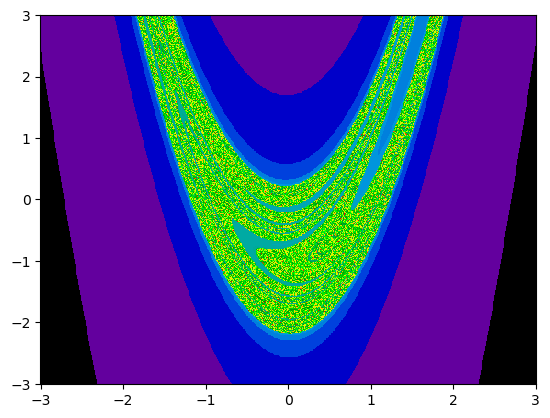

In [22]:
plt.pcolor(X, Y, escape[:, 1].reshape(grid_size, grid_size), cmap="nipy_spectral", norm=mpl.colors.LogNorm(vmin=1, vmax=escape.max()))

In [23]:
type(escape[:, 1].max()), isinstance(escape[:, 1].max(), np.int32)

(numpy.int64, False)

In [24]:
escape_arr = np.asarray(escape[:, 1], dtype=int)

In [25]:
type(escape_arr.max()), isinstance(escape_arr.max(), int)

(numpy.int64, False)

In [26]:
type(escape[:, 1].max())

numpy.int64

In [27]:
sp = henon.survival_probability(escape[:, 1], escape[:, 1].max())

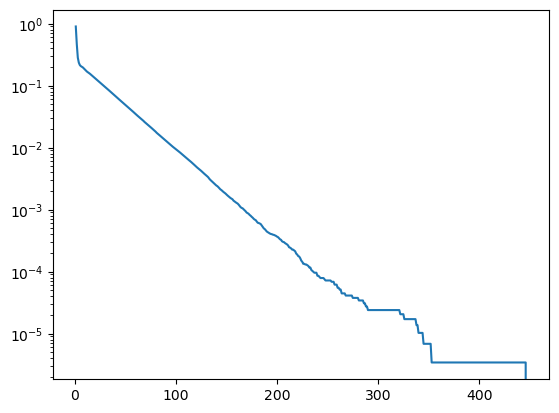

In [28]:
plt.plot(sp[0], sp[1])
#plt.xscale("log")
plt.yscale("log")